<a href="https://colab.research.google.com/github/Anirudhakumar/DS-/blob/master/Copy_of_MarketMixModeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 

In [ ]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#reading the data 
data_frame=pd.read_csv("./drive/My Drive/ConsumerElectronics.csv")
media_data=pd.read_excel("./drive/My Drive/Media data and other information.xlsx",sheet_name='Media Investment')
climate_2015=pd.read_csv("./drive/My Drive/ONTARIO-2015.csv")
climate_2016=pd.read_csv("./drive/My Drive/ONTARIO-2016.csv")

In [ ]:
df=data_frame.copy()

In [ ]:
#printing some rows of data
df.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3.419301e+15,3.419301e+15,6400,1,\N,\N,COD,5,-1.01299130778588E+018,-7.79175582905735E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1.420831e+15,1.420831e+15,6900,1,\N,\N,COD,7,-8.99032457905512E+018,7.33541149097431E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2.421913e+15,2.421913e+15,1990,1,\N,\N,COD,10,-1.0404429420466E+018,-7.47768776228657E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4.416592e+15,4.416592e+15,1690,1,\N,\N,Prepaid,4,-7.60496084352714E+018,-5.83593163877661E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4.419525e+15,4.419525e+15,1618,1,\N,\N,Prepaid,6,2.8945572083453E+018,5.34735360997242E+017,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3


In [ ]:
#checking data info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1648824 entries, 0 to 1648823
Data columns (total 20 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   fsn_id                           1648824 non-null  object 
 1   order_date                       1648824 non-null  object 
 2   Year                             1648824 non-null  int64  
 3   Month                            1648824 non-null  int64  
 4   order_id                         1648824 non-null  float64
 5   order_item_id                    1648824 non-null  float64
 6   gmv                              1648824 non-null  object 
 7   units                            1648824 non-null  int64  
 8   deliverybdays                    1648824 non-null  object 
 9   deliverycdays                    1648824 non-null  object 
 10  s1_fact.order_payment_type       1648824 non-null  object 
 11  sla                              1648824 non-null 

In [ ]:
#We should change the order_date data type for future use
df["order_date"]=pd.to_datetime(df["order_date"], errors='coerce')

In [ ]:
#while changing the gmv column to numeric we can find we have some data where gmv is " "
df[df["gmv"]==" "].head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
8,ACCCX3S5JGAJETYR,2015-10-16 00:49:14,2015,10,2.417870e+15,2.417870e+15,,1,\N,\N,Prepaid,9,,,CE,CameraAccessory,CameraAccessory,CameraTripod,4044,5
95,ACCCX3SGAR6NNBMR,2015-10-05 13:25:48,2015,10,2.408842e+15,2.408842e+15,,1,\N,\N,Prepaid,3,,,CE,CameraAccessory,CameraAccessory,Lens,7150,5
124,ACCCX3SGDGPZAQXD,2015-10-16 01:49:30,2015,10,4.417909e+15,4.417909e+15,,1,\N,\N,Prepaid,6,,,CE,CameraAccessory,CameraAccessory,Lens,17995,5
142,ACCCX3SGDGPZAQXD,2015-10-16 22:59:20,2015,10,4.418717e+15,4.418717e+15,,1,\N,\N,Prepaid,6,,,CE,CameraAccessory,CameraAccessory,Lens,17995,5
186,ACCCX3SGDGPZAQXD,2015-10-16 07:30:25,2015,10,4.418158e+15,4.418158e+15,,1,\N,\N,Prepaid,6,,,CE,CameraAccessory,CameraAccessory,Lens,17995,5


In [ ]:
df["gmv"].replace(" ",0,inplace=True)

In [ ]:
#we need to change the data type of gmv(Gross Merchandise Value or Revenue) to int as this is of int type
df["gmv"]=pd.to_numeric(df["gmv"])

In [ ]:
#checking shape of data
df.shape

(1648824, 20)

In [ ]:
#checking for null values in dataset
df.isnull().sum()

fsn_id                             0
order_date                         0
Year                               0
Month                              0
order_id                           0
order_item_id                      0
gmv                                0
units                              0
deliverybdays                      0
deliverycdays                      0
s1_fact.order_payment_type         0
sla                                0
cust_id                            0
pincode                            0
product_analytic_super_category    0
product_analytic_category          0
product_analytic_sub_category      0
product_analytic_vertical          0
product_mrp                        0
product_procurement_sla            0
dtype: int64

In [ ]:
df=df[(df["order_date"]>="2015-07-01") & (df["order_date"]<"2016-07-01")]

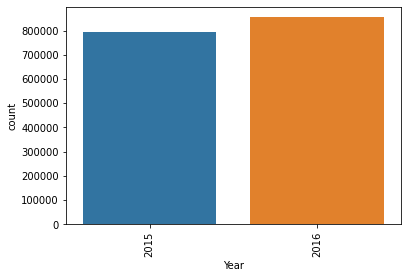

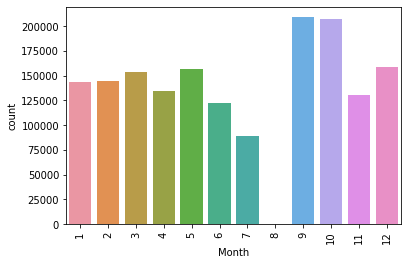

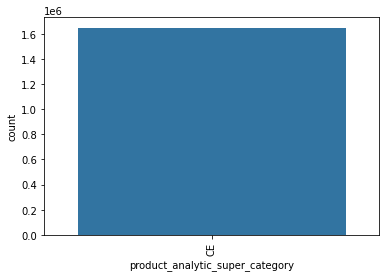

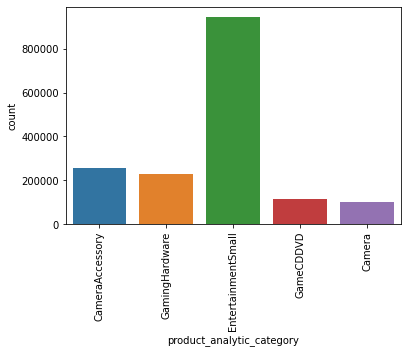

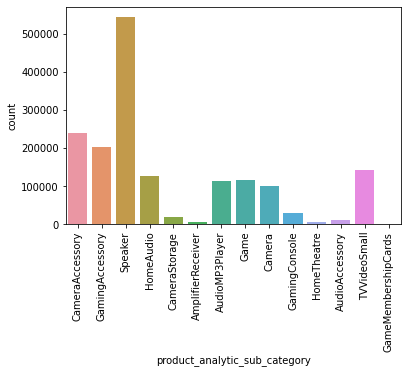

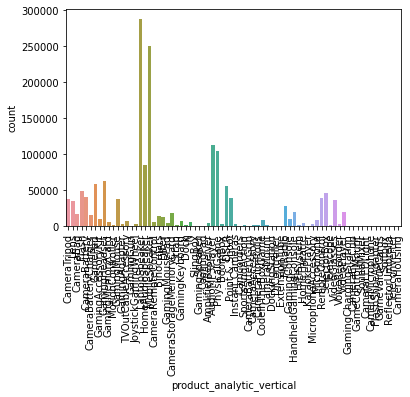

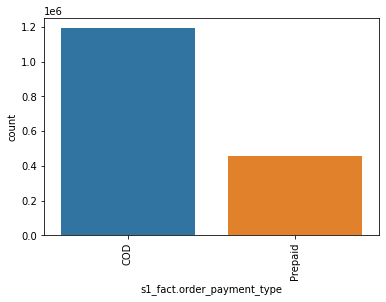

In [ ]:
arr=["Year","Month","product_analytic_super_category","product_analytic_category","product_analytic_sub_category","product_analytic_vertical","s1_fact.order_payment_type"]
for i in arr:
  sns.countplot(x=i,data=df)
  plt.xticks(rotation=90)
  plt.show()

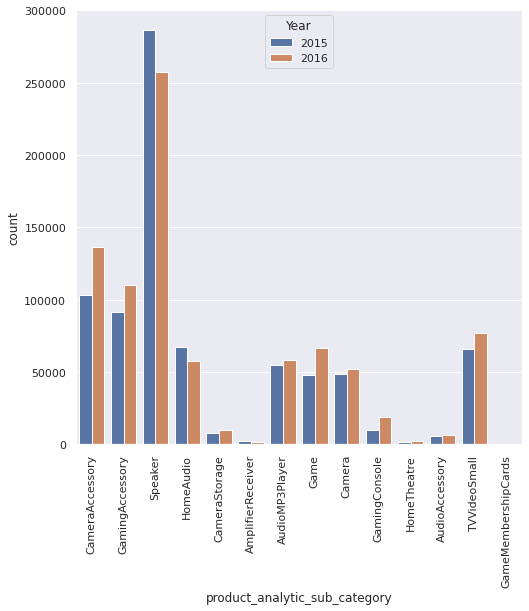

In [ ]:
plt.figure(figsize=(8,8))
sns.set(style="darkgrid")
sns.countplot(x="product_analytic_sub_category",hue="Year",data=df)
plt.xticks(rotation=90)
plt.show()

In [ ]:
#As we can see we have only 2 types of payment i am converting them into 0 and 1 that may be helpful in future calculation
df["s1_fact.order_payment_type"].replace("COD",1,inplace=True)
df["s1_fact.order_payment_type"].replace("Prepaid",0,inplace=True)

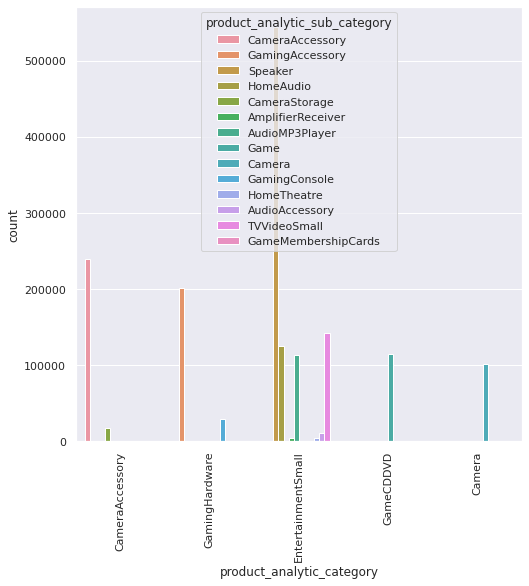

In [ ]:
plt.figure(figsize=(8,8))
sns.set(style="darkgrid")
sns.countplot(x="product_analytic_category",hue="product_analytic_sub_category",data=df)
plt.xticks(rotation=90)
plt.show()

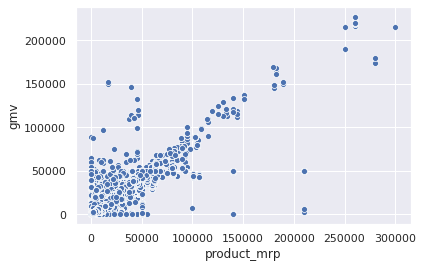

In [ ]:
sns.scatterplot(x="product_mrp",y="gmv",data=df)

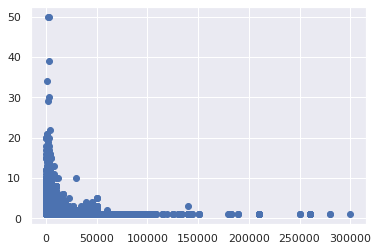

In [ ]:
plt.scatter(df["product_mrp"],df["units"])

In [ ]:
#sns.pairplot(df)

In [ ]:
df.describe()

,Year,Month,order_id,order_item_id,gmv,units,s1_fact.order_payment_type,sla,product_mrp,product_procurement_sla
count,1.648215e+06,1.648215e+06,1.648215e+06,1.648215e+06,1.648215e+06,1.648215e+06,1.648215e+06,1.648215e+06,1.648215e+06,1.648215e+06
mean,2.015518e+03,6.585501e+00,2.842324e+15,1.376019e+16,2.453656e+03,1.022088e+00,7.225750e-01,5.687996e+00,4.108187e+03,5.402785e+00
std,4.996622e-01,3.624011e+00,1.269160e+15,5.595594e+16,5.611181e+03,2.535490e-01,4.477281e-01,2.983321e+00,8.510337e+03,5.345918e+01
min,2.015000e+03,1.000000e+00,7.633152e+07,1.080165e+08,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00
25%,2.015000e+03,3.000000e+00,1.602512e+15,1.606665e+15,3.390000e+02,1.000000e+00,0.000000e+00,4.000000e+00,7.990000e+02,1.000000e+00
50%,2.016000e+03,6.000000e+00,2.611775e+15,2.619112e+15,7.490000e+02,1.000000e+00,1.000000e+00,6.000000e+00,1.599000e+03,2.000000e+00
75%,2.016000e+03,1.000000e+01,3.610554e+15,4.397703e+15,1.999000e+03,1.000000e+00,1.000000e+00,7.000000e+00,3.499000e+03,3.000000e+00
max,2.016000e+03,1.200000e+01,5.395077e+15,3.000373e+17,2.269470e+05,5.000000e+01,1.000000e+00,1.006000e+03,2.999990e+05,1.000000e+03


## Some Checks on Data like mrp should be greater than 0.

In [ ]:
#removing rows having price < 0 as we can see in the description the minimum value of price is 0. And this is not correct
df=df[df["product_mrp"]>0]

In [ ]:
#gmv(Gross Merchandise Value or Revenue) should be greater than product_mrp * units. So, removing the data which does not satisfy the criteria
df=df[df["gmv"]<df["product_mrp"]*df["units"]]

In [ ]:
#printing the shape of data after removing unwanted data
df.shape

(1583842, 20)

In [ ]:
#printing the shape of original data 
data_frame.shape

(1648824, 20)

In [ ]:
# printing %ge of data loss
round(100*((data_frame.shape[0]-df.shape[0])/data_frame.shape[0]),2)

3.94

So we are loosing only 4 percent of data . And it will not impact our analysis.

### Dividing the data on the basis of product subcategories.

In [ ]:
df["product_analytic_sub_category"].value_counts()

Speaker                533134
CameraAccessory        229488
GamingAccessory        196023
TVVideoSmall           140852
HomeAudio              118542
AudioMP3Player         111349
Camera                  99576
Game                    91021
GamingConsole           27605
CameraStorage           17695
AudioAccessory          10302
HomeTheatre              4141
AmplifierReceiver        4017
GameMembershipCards        97
Name: product_analytic_sub_category, dtype: int64

In [ ]:
df_homeaudio=df[df["product_analytic_sub_category"] == "HomeAudio"].copy()

In [ ]:
df_CameraAccessory=df[df["product_analytic_sub_category"] == "CameraAccessory"].copy()

In [ ]:
df_GamingAccessory=df[df["product_analytic_sub_category"] == "GamingAccessory"].copy()

In [ ]:
#printing some data from each of the data frame
df_homeaudio.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
2840,ACCCZZC9XHZZ49FS,2015-10-03 20:35:30,2015,10,1.407396e+15,1.407396e+15,7049.0,1,\N,\N,0,5,-7.59891246232286E+018,-1.44900165321989E+018,CE,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,7499,5
2841,ACCCZZC9XHZZ49FS,2015-10-16 09:03:09,2015,10,2.418214e+15,2.418214e+15,5489.0,1,\N,\N,0,2,-2.19573032414406E+018,5.51019732830323E+018,CE,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,7499,5
2842,ACCCZZC9XHZZ49FS,2015-10-16 21:55:31,2015,10,2.418676e+15,2.418676e+15,6255.0,1,\N,\N,0,9,-8.69764155132085E+018,4.07895330887739E+018,CE,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,7499,5
2843,ACCCZZC9XHZZ49FS,2015-10-16 23:25:07,2015,10,1.418727e+15,1.418727e+15,6099.0,1,\N,\N,0,3,-4.98961621154979E+018,9.06892083579869E+018,CE,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,7499,5
2844,ACCCZZC9XHZZ49FS,2015-10-20 17:42:59,2015,10,2.421984e+15,2.421984e+15,6850.0,1,\N,\N,1,9,6.04651405718702E+018,2.15973604441674E+018,CE,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,7499,5


In [ ]:
df_CameraAccessory.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3.419301e+15,3.419301e+15,6400.0,1,\N,\N,1,5,-1.01299130778588E+018,-7.79175582905735E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1.420831e+15,1.420831e+15,6900.0,1,\N,\N,1,7,-8.99032457905512E+018,7.33541149097431E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2.421913e+15,2.421913e+15,1990.0,1,\N,\N,1,10,-1.0404429420466E+018,-7.47768776228657E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4.416592e+15,4.416592e+15,1690.0,1,\N,\N,0,4,-7.60496084352714E+018,-5.83593163877661E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4.419525e+15,4.419525e+15,1618.0,1,\N,\N,0,6,2.8945572083453E+018,5.34735360997242E+017,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3


In [ ]:
df_GamingAccessory.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
1598,ACCCZ34CBVZJTVQF,2015-10-04 19:24:36,2015,10,1.408217e+15,1.408217e+15,3075.0,1,\N,\N,1,9,4.34477146699389E+018,-1.78050760490657E+018,CE,GamingHardware,GamingAccessory,GamePad,3999,5
1599,ACCCZ34CBVZJTVQF,2015-10-14 22:54:54,2015,10,1.416985e+15,1.416985e+15,2750.0,1,\N,\N,1,7,9.04157730463172E+018,-5.1750058942027E+018,CE,GamingHardware,GamingAccessory,GamePad,3999,5
1600,ACCCZ34CBVZJTVQF,2015-10-15 20:19:38,2015,10,1.417669e+15,1.417669e+15,2899.0,1,\N,\N,0,5,8.97383112414031E+018,-7.07126047139944E+017,CE,GamingHardware,GamingAccessory,GamePad,3999,5
1601,ACCCZ34CBVZJTVQF,2015-10-17 18:21:43,2015,10,1.419415e+15,1.419415e+15,2609.0,1,\N,\N,0,5,-4.82414273647179E+018,6.40491320207757E+018,CE,GamingHardware,GamingAccessory,GamePad,3999,5
1602,ACCCZ34CBVZJTVQF,2015-10-26 17:49:39,2015,10,1.427168e+15,1.427168e+15,2772.0,1,\N,\N,0,5,-3.30536529726028E+018,2.08941992580576E+018,CE,GamingHardware,GamingAccessory,GamePad,3999,5


In [ ]:
#printing the shape of all the three data frame
print(df_CameraAccessory.shape)
print(df_GamingAccessory.shape)
print(df_homeaudio.shape)

(229488, 20)
(196023, 20)
(118542, 20)


In [ ]:
df_homeaudio.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
2840,ACCCZZC9XHZZ49FS,2015-10-03 20:35:30,2015,10,1.407396e+15,1.407396e+15,7049.0,1,\N,\N,0,5,-7.59891246232286E+018,-1.44900165321989E+018,CE,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,7499,5
2841,ACCCZZC9XHZZ49FS,2015-10-16 09:03:09,2015,10,2.418214e+15,2.418214e+15,5489.0,1,\N,\N,0,2,-2.19573032414406E+018,5.51019732830323E+018,CE,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,7499,5
2842,ACCCZZC9XHZZ49FS,2015-10-16 21:55:31,2015,10,2.418676e+15,2.418676e+15,6255.0,1,\N,\N,0,9,-8.69764155132085E+018,4.07895330887739E+018,CE,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,7499,5
2843,ACCCZZC9XHZZ49FS,2015-10-16 23:25:07,2015,10,1.418727e+15,1.418727e+15,6099.0,1,\N,\N,0,3,-4.98961621154979E+018,9.06892083579869E+018,CE,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,7499,5
2844,ACCCZZC9XHZZ49FS,2015-10-20 17:42:59,2015,10,2.421984e+15,2.421984e+15,6850.0,1,\N,\N,1,9,6.04651405718702E+018,2.15973604441674E+018,CE,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,7499,5


In [ ]:
#Adding Week column in the each data frame
df_CameraAccessory['order_week'] = df_CameraAccessory['order_date'].dt.week
df_CameraAccessory.loc[(df_CameraAccessory.Year == 2016) & (df_CameraAccessory['order_date'].dt.week !=53), 'order_week'] = 53+df_CameraAccessory['order_date'].dt.week
df_GamingAccessory[ 'order_week'] = df_GamingAccessory['order_date'].dt.week
df_GamingAccessory.loc[(df_GamingAccessory.Year == 2016) & (df_GamingAccessory['order_date'].dt.week !=53),'order_week'] = 53+df_GamingAccessory['order_date'].dt.week
df_homeaudio['order_week'] = df_homeaudio['order_date'].dt.week
df_homeaudio.loc[(df_homeaudio.Year == 2016) & (df_homeaudio['order_date'].dt.week !=53),'order_week'] = 53+df_homeaudio['order_date'].dt.week

In [ ]:
#Printing some rows of modified data frame
df_homeaudio.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,order_week
2840,ACCCZZC9XHZZ49FS,2015-10-03 20:35:30,2015,10,1.407396e+15,1.407396e+15,7049.0,1,\N,\N,0,5,-7.59891246232286E+018,-1.44900165321989E+018,CE,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,7499,5,40
2841,ACCCZZC9XHZZ49FS,2015-10-16 09:03:09,2015,10,2.418214e+15,2.418214e+15,5489.0,1,\N,\N,0,2,-2.19573032414406E+018,5.51019732830323E+018,CE,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,7499,5,42
2842,ACCCZZC9XHZZ49FS,2015-10-16 21:55:31,2015,10,2.418676e+15,2.418676e+15,6255.0,1,\N,\N,0,9,-8.69764155132085E+018,4.07895330887739E+018,CE,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,7499,5,42
2843,ACCCZZC9XHZZ49FS,2015-10-16 23:25:07,2015,10,1.418727e+15,1.418727e+15,6099.0,1,\N,\N,0,3,-4.98961621154979E+018,9.06892083579869E+018,CE,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,7499,5,42
2844,ACCCZZC9XHZZ49FS,2015-10-20 17:42:59,2015,10,2.421984e+15,2.421984e+15,6850.0,1,\N,\N,1,9,6.04651405718702E+018,2.15973604441674E+018,CE,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,7499,5,43


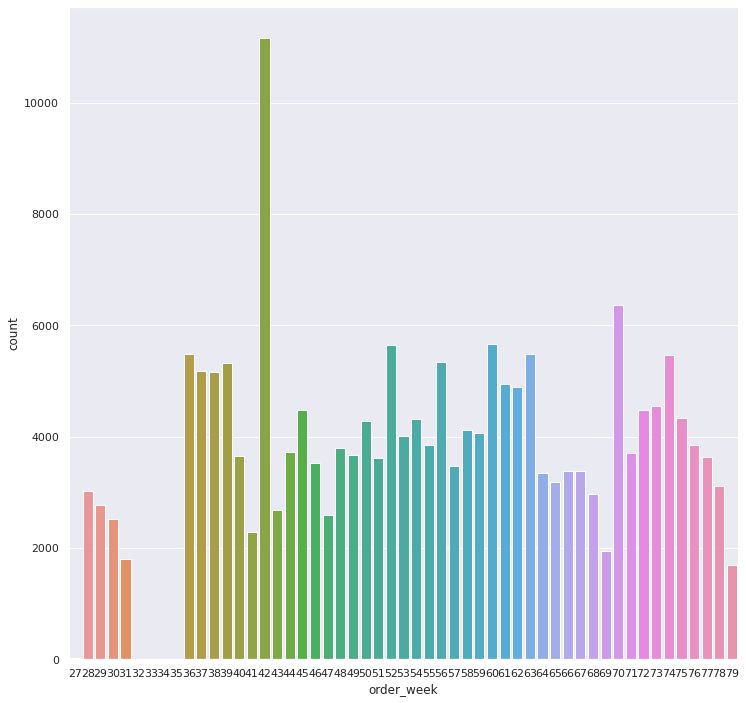

In [ ]:
plt.figure(figsize=(12,12))
sns.countplot(x="order_week",data=df_GamingAccessory)
plt.show()

Adding Discount column in all the data frame 

In [ ]:
df_CameraAccessory['Discount'] = (df_CameraAccessory['product_mrp']-df_CameraAccessory['gmv'])/df_CameraAccessory['units']

In [ ]:
df_GamingAccessory['Discount'] = (df_GamingAccessory['product_mrp']-df_GamingAccessory['gmv'])/df_GamingAccessory['units']
df_homeaudio['Discount'] = (df_homeaudio['product_mrp']-df_homeaudio['gmv'])/df_homeaudio['units']

In [ ]:
df_CameraAccessory.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,order_week,Discount
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3.419301e+15,3.419301e+15,6400.0,1,\N,\N,1,5,-1.01299130778588E+018,-7.79175582905735E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0,42,790.0
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1.420831e+15,1.420831e+15,6900.0,1,\N,\N,1,7,-8.99032457905512E+018,7.33541149097431E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0,43,290.0
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2.421913e+15,2.421913e+15,1990.0,1,\N,\N,1,10,-1.0404429420466E+018,-7.47768776228657E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,43,109.0
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4.416592e+15,4.416592e+15,1690.0,1,\N,\N,0,4,-7.60496084352714E+018,-5.83593163877661E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,42,409.0
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4.419525e+15,4.419525e+15,1618.0,1,\N,\N,0,6,2.8945572083453E+018,5.34735360997242E+017,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,42,481.0


In [ ]:
CameraAccessory=round(df_CameraAccessory.groupby("order_week")["Year","Month","gmv","units","sla","product_mrp","Discount"].mean())

In [ ]:
#printing some rows of the gropped data frame 
CameraAccessory.head()

,Year,Month,gmv,units,sla,product_mrp,Discount
order_week,,,,,,,
27,2015.0,7.0,674.0,1.0,2.0,1512.0,838.0
28,2015.0,7.0,1372.0,1.0,7.0,2488.0,1105.0
29,2015.0,7.0,1488.0,1.0,6.0,2567.0,1079.0
30,2015.0,7.0,1454.0,1.0,6.0,2571.0,1121.0
31,2015.0,7.0,1464.0,1.0,6.0,2498.0,1034.0


In [ ]:
GamingAccessory=round(df_GamingAccessory.groupby("order_week")["Year","Month","gmv","units","sla","product_mrp","Discount"].mean())

In [ ]:
GamingAccessory.head()

,Year,Month,gmv,units,sla,product_mrp,Discount
order_week,,,,,,,
27,2015.0,7.0,1294.0,1.0,3.0,3766.0,2480.0
28,2015.0,7.0,899.0,1.0,5.0,1828.0,939.0
29,2015.0,7.0,828.0,1.0,5.0,1805.0,983.0
30,2015.0,7.0,1038.0,1.0,5.0,2322.0,1281.0
31,2015.0,7.0,1038.0,1.0,6.0,5045.0,4027.0


In [ ]:
homeaudio=round(df_homeaudio.groupby("order_week")["Year","Month","gmv","units","sla","product_mrp","Discount"].mean())

In [ ]:
homeaudio.head()

,Year,Month,gmv,units,sla,product_mrp,Discount
order_week,,,,,,,
27,2015.0,7.0,2733.0,1.0,3.0,4712.0,1980.0
28,2015.0,7.0,2208.0,1.0,8.0,3512.0,1310.0
29,2015.0,7.0,2209.0,1.0,7.0,3622.0,1415.0
30,2015.0,7.0,2126.0,1.0,7.0,3554.0,1430.0
31,2015.0,7.0,2183.0,1.0,7.0,3606.0,1425.0


In [ ]:
media_data.head()

,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,NPS,Stock Index
0,2015,7,17.061775,0.215330,2.533014,7.414270,0.000933,1.327278,0.547254,5.023697,54.599588,1177
1,2015,8,5.064306,0.006438,1.278074,1.063332,0.000006,0.129244,0.073684,2.513528,59.987101,1206
2,2015,9,96.254380,3.879504,1.356528,62.787651,0.610292,16.379990,5.038266,6.202149,46.925419,1101
3,2015,10,170.156297,6.144711,12.622480,84.672532,3.444075,24.371778,6.973711,31.927011,44.398389,1210
4,2015,11,51.216220,4.220630,1.275469,14.172116,0.168633,19.561574,6.595767,5.222032,47.000000,1233


In [ ]:
CameraAccessory.reset_index(inplace=True)
camedia=CameraAccessory.merge(media_data,how="inner",on=["Year","Month"])

In [ ]:
camedia.head()

,order_week,Year,Month,gmv,units,sla,product_mrp,Discount,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,NPS,Stock Index
0,27,2015.0,7.0,674.0,1.0,2.0,1512.0,838.0,17.061775,0.21533,2.533014,7.41427,0.000933,1.327278,0.547254,5.023697,54.599588,1177
1,28,2015.0,7.0,1372.0,1.0,7.0,2488.0,1105.0,17.061775,0.21533,2.533014,7.41427,0.000933,1.327278,0.547254,5.023697,54.599588,1177
2,29,2015.0,7.0,1488.0,1.0,6.0,2567.0,1079.0,17.061775,0.21533,2.533014,7.41427,0.000933,1.327278,0.547254,5.023697,54.599588,1177
3,30,2015.0,7.0,1454.0,1.0,6.0,2571.0,1121.0,17.061775,0.21533,2.533014,7.41427,0.000933,1.327278,0.547254,5.023697,54.599588,1177
4,31,2015.0,7.0,1464.0,1.0,6.0,2498.0,1034.0,17.061775,0.21533,2.533014,7.41427,0.000933,1.327278,0.547254,5.023697,54.599588,1177


In [ ]:
homeaudio.reset_index(inplace=True)

In [ ]:
hamedia=homeaudio.merge(media_data,how="inner",on=["Year","Month"])

In [ ]:
hamedia.head()

,order_week,Year,Month,gmv,units,sla,product_mrp,Discount,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,NPS,Stock Index
0,27,2015.0,7.0,2733.0,1.0,3.0,4712.0,1980.0,17.061775,0.21533,2.533014,7.41427,0.000933,1.327278,0.547254,5.023697,54.599588,1177
1,28,2015.0,7.0,2208.0,1.0,8.0,3512.0,1310.0,17.061775,0.21533,2.533014,7.41427,0.000933,1.327278,0.547254,5.023697,54.599588,1177
2,29,2015.0,7.0,2209.0,1.0,7.0,3622.0,1415.0,17.061775,0.21533,2.533014,7.41427,0.000933,1.327278,0.547254,5.023697,54.599588,1177
3,30,2015.0,7.0,2126.0,1.0,7.0,3554.0,1430.0,17.061775,0.21533,2.533014,7.41427,0.000933,1.327278,0.547254,5.023697,54.599588,1177
4,31,2015.0,7.0,2183.0,1.0,7.0,3606.0,1425.0,17.061775,0.21533,2.533014,7.41427,0.000933,1.327278,0.547254,5.023697,54.599588,1177


In [ ]:
GamingAccessory.reset_index(inplace=True)
gamedia=GamingAccessory.merge(media_data,how="inner",on=["Year","Month"])

In [ ]:
gamedia.head()

,order_week,Year,Month,gmv,units,sla,product_mrp,Discount,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,NPS,Stock Index
0,27,2015.0,7.0,1294.0,1.0,3.0,3766.0,2480.0,17.061775,0.21533,2.533014,7.41427,0.000933,1.327278,0.547254,5.023697,54.599588,1177
1,28,2015.0,7.0,899.0,1.0,5.0,1828.0,939.0,17.061775,0.21533,2.533014,7.41427,0.000933,1.327278,0.547254,5.023697,54.599588,1177
2,29,2015.0,7.0,828.0,1.0,5.0,1805.0,983.0,17.061775,0.21533,2.533014,7.41427,0.000933,1.327278,0.547254,5.023697,54.599588,1177
3,30,2015.0,7.0,1038.0,1.0,5.0,2322.0,1281.0,17.061775,0.21533,2.533014,7.41427,0.000933,1.327278,0.547254,5.023697,54.599588,1177
4,31,2015.0,7.0,1038.0,1.0,6.0,5045.0,4027.0,17.061775,0.21533,2.533014,7.41427,0.000933,1.327278,0.547254,5.023697,54.599588,1177


In [70]:
climate_2015.head()

,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),Max Temp Flag,Min Temp (°C),Min Temp Flag,Mean Temp (°C),Mean Temp Flag,Heat Deg Days (°C),Heat Deg Days Flag,Cool Deg Days (°C),Cool Deg Days Flag,Total Rain (mm),Total Rain Flag,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
0,2015-01-01,2015,1,1,†,0.0,NaN,-8.5,NaN,-4.3,NaN,22.3,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
1,2015-01-02,2015,1,2,†,3.0,NaN,-3.0,NaN,0.0,NaN,18.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2,2015-01-03,2015,1,3,†,2.5,NaN,-4.0,NaN,-0.8,NaN,18.8,NaN,0.0,NaN,24.0,NaN,0.0,NaN,24.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
3,2015-01-04,2015,1,4,†,2.5,NaN,0.0,NaN,1.3,NaN,16.7,NaN,0.0,NaN,0.0,NaN,1.0,NaN,1.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
4,2015-01-05,2015,1,5,†,-10.0,NaN,-13.5,NaN,-11.8,NaN,29.8,NaN,0.0,NaN,0.0,NaN,3.0,NaN,3.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN


In [71]:
climate_2016.head()

,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),Max Temp Flag,Min Temp (°C),Min Temp Flag,Mean Temp (°C),Mean Temp Flag,Heat Deg Days (°C),Heat Deg Days Flag,Cool Deg Days (°C),Cool Deg Days Flag,Total Rain (mm),Total Rain Flag,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
0,2016-01-01,2016,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-01-02,2016,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-01-03,2016,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-01-04,2016,1,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-01-05,2016,1,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
